In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-attack-analysis-prediction-dataset/o2Saturation.csv
/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv


In [2]:
# Importing important modules for predicting
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [3]:
#loading datasets
df1=pd.read_csv("../input/heart-attack-analysis-prediction-dataset/heart.csv")
df2=pd.read_csv("../input/heart-attack-analysis-prediction-dataset/o2Saturation.csv")

In [4]:
# Viewing dataset
df1.head(5)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
#Here since second document had only one column we took mean of it so as to get the average o2 levels for aa normal human.
df2.mean()

98.6    98.239275
dtype: float64

In [6]:
# checking whether the data has any missing values.
df1.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [7]:
# oh god , luckily there are none  

In [9]:
# Now we check whether the dataset is balanced or not
output_with_1=round(len(df1[df1['output']==1]['output'])/len(df1['output']),3)
output_with_0=round(len(df1[df1['output']==0]['output'])/len(df1['output']),3)
print(output_with_1,output_with_0)

0.545 0.455


Here we see that the dataset is balanced hence accuracy is a good measure to calculate the predictability of the model

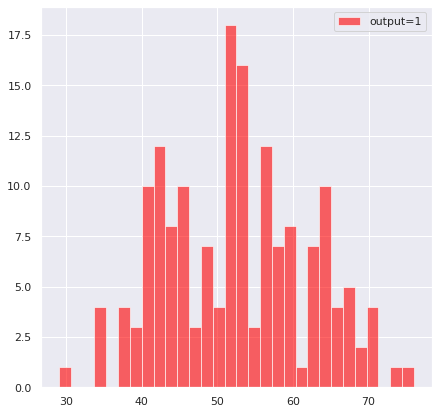

In [10]:
# Plotting a histogram of people who had heart attack.
plt.figure(figsize=(7,7))
df1[df1['output']==1]['age'].hist(bins=30,color='red',label='output=1',alpha=0.6)
plt.legend()

 From this we interpret that people mostly btw age of 50-65 are more prone to having one than others

<AxesSubplot:xlabel='output', ylabel='count'>

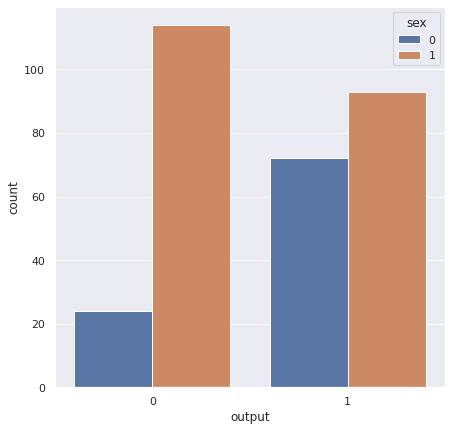

In [11]:
plt.figure(figsize=(7,7))
sns.countplot(x='output',data=df1,hue='sex')

Here from the countplot we get that gender 0 is more prone to having a heart attack than 1 

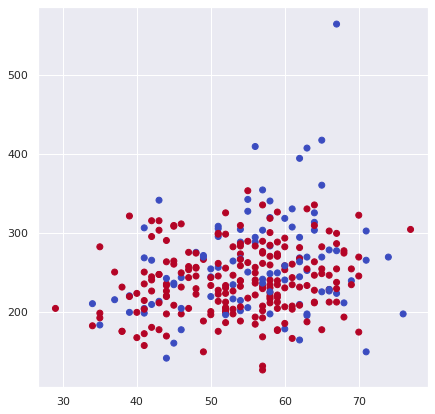

In [12]:
plt.figure(figsize=(7,7))
plt.scatter(df1['age'],df1['chol'],c=df1['sex'],cmap='coolwarm')

Here we interpret that people have higher tendencies of getting heart attack if they have high cholestrol lvl and are leaning towards the age of 60.

Now we start modelling , since we have binary outputs so a logistic regression is suitable for this dataset

In [13]:
# splitting output from other features
x=df1.drop('output',axis=1)
y=df1['output']

In [15]:
# train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [16]:
# to have classification report and confusion matrix
from sklearn.metrics import confusion_matrix,classification_report

In [17]:
from sklearn.linear_model import LogisticRegression as LR
lr=LR()
lr.fit(x_train,y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [18]:
predictions_lr=lr.predict(x_test)
print(classification_report(y_test,predictions_lr))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



Here we interpret that assuing for a normal heart this model will predict with an accuracy of 89 percent.